In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [7]:

# Load your financial market time series data (replace with your own data)
# Sample dataset with fictional daily stock prices
data = {
    'Date': pd.date_range(start='2021-01-01', periods=365, freq='D'),
    'Price': np.random.rand(365) * 100 + 100  # Simulated stock prices
}


In [9]:

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)


In [10]:

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit an ARIMA model (you can adjust the order parameters)
order = (1, 1, 1)  # Replace with suitable values
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse:.2f}')


Mean Squared Error (MSE): 787.33


/opt/homebrew/Caskroom/miniforge/base/envs/test_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/test_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/test_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


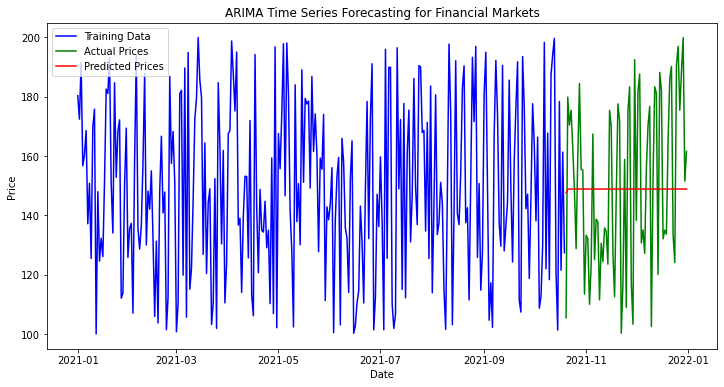

In [11]:

# Plot the original time series and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Prices', color='green')
plt.plot(test_data.index, predictions, label='Predicted Prices', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Time Series Forecasting for Financial Markets')
plt.show()
